### Music Recommendation:

Music recommender system can suggest songs to users based on their listening pattern.

#### Author: Thilagavathy R Vasantharaja

#### 1.Loading Libraries

In [3]:
! pip install xgboost

In [65]:
#from sklearn import cross_validation, grid_search, metrics, ensemble
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

#### 2.Data Preparation

In [66]:
import os
os.getcwd()

'C:\\Users\\vasanth\\Desktop\\Anaconda1\\Anaconda\\Internship\\LetsGrowMore\\kkbox-music-recommendation-challenge'

In [69]:
train = pd.read_csv('train.csv')
test=pd.read_csv("test.csv")
members=pd.read_csv("members.csv")
songs=pd.read_csv("songs.csv")
print('train',train.shape)
print('test',test.shape)
print('members',members.shape)
print('songs',songs.shape)

train (7377418, 6)
test (2556790, 6)
members (34403, 7)
songs (2296320, 7)


#### 3.Understanding data

In [7]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [8]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [9]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [10]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


#### 4. Data Pre-processing

In [70]:
# 1% sample of items
train = train.sample(frac=0.01)

In [12]:
train.shape

(73774, 6)

In [71]:
train = pd.merge(train, songs, on='song_id', how='left')

In [14]:
train.shape

(73774, 12)

In [15]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,x1staqrE1JMIUlvyEVgMYgDfZhlTGfpA3qtPSj+N77g=,Q6wyMBLeQj7nW5AjGjdB9tsO1k7773SUHUtQVUjEd+o=,my library,Local playlist more,local-library,0,270419,465,蔡依林 (Jolin Tsai),NaN,NaN,3.0
1,vb2J2H2GlF6ensG79o/Gdnku4AqJ4OyBdvDzRrjgnd8=,vzlTBFqyEx7EhM4XyC+nJeuQ8GNauvoRcsfCITlm4SQ=,my library,Local playlist more,local-library,1,247104,2157,喬幼,石國人,石國人,10.0
2,wzpHtitt7fkUvmazi47+pvhxURlLo3vFPojqFUHGT6w=,EfJnvKhjaAl7I2+OAkPzFIq/FBvBjZurEKr4VGViqj4=,my library,Online playlist more,online-playlist,0,203049,921,Baek A Yeon,Tablo| Tukutz| Conan| Roco,Tablo| Mithra| Ji Hoon| Goo Ji An,31.0
3,mDUAZS/nBqo4A/FmrPg8vCoATNMmdzsfFcVf3qhG2fQ=,T8EzYq0+Zfa4ckPP5CE9I9Q4haed0cM0YgFaUpbz6i0=,radio,Radio,radio,0,141479,786,Jim Brickman,NaN,NaN,-1.0
4,CYb4RkfFA6c2hTfrymGqHECXGPS4cCor0pbWWzIJtaA=,6JV5IxQMWfhlXN8bvWKUaj9HzB0wuHkU3dEgf4JxOBY=,my library,Local playlist more,local-library,1,280137,921,張宇 (Phil Chang),NaN,NaN,3.0


In [72]:
train = pd.merge(train, members, on='msno', how='left')

In [17]:
train.shape

(73774, 18)

In [18]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,x1staqrE1JMIUlvyEVgMYgDfZhlTGfpA3qtPSj+N77g=,Q6wyMBLeQj7nW5AjGjdB9tsO1k7773SUHUtQVUjEd+o=,my library,Local playlist more,local-library,0,270419,465,蔡依林 (Jolin Tsai),NaN,NaN,3.0,1,16,NaN,9,20170103,20171231
1,vb2J2H2GlF6ensG79o/Gdnku4AqJ4OyBdvDzRrjgnd8=,vzlTBFqyEx7EhM4XyC+nJeuQ8GNauvoRcsfCITlm4SQ=,my library,Local playlist more,local-library,1,247104,2157,喬幼,石國人,石國人,10.0,13,25,female,9,20121121,20170815
2,wzpHtitt7fkUvmazi47+pvhxURlLo3vFPojqFUHGT6w=,EfJnvKhjaAl7I2+OAkPzFIq/FBvBjZurEKr4VGViqj4=,my library,Online playlist more,online-playlist,0,203049,921,Baek A Yeon,Tablo| Tukutz| Conan| Roco,Tablo| Mithra| Ji Hoon| Goo Ji An,31.0,15,0,NaN,9,20160312,20170617
3,mDUAZS/nBqo4A/FmrPg8vCoATNMmdzsfFcVf3qhG2fQ=,T8EzYq0+Zfa4ckPP5CE9I9Q4haed0cM0YgFaUpbz6i0=,radio,Radio,radio,0,141479,786,Jim Brickman,NaN,NaN,-1.0,6,21,male,9,20130919,20171026
4,CYb4RkfFA6c2hTfrymGqHECXGPS4cCor0pbWWzIJtaA=,6JV5IxQMWfhlXN8bvWKUaj9HzB0wuHkU3dEgf4JxOBY=,my library,Local playlist more,local-library,1,280137,921,張宇 (Phil Chang),NaN,NaN,3.0,13,18,female,13,20161127,20171023


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 0 to 73773
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    73774 non-null  object 
 1   song_id                 73774 non-null  object 
 2   source_system_tab       73551 non-null  object 
 3   source_screen_name      69640 non-null  object 
 4   source_type             73585 non-null  object 
 5   target                  73774 non-null  int64  
 6   song_length             73774 non-null  int64  
 7   genre_ids               72562 non-null  object 
 8   artist_name             73774 non-null  object 
 9   composer                56929 non-null  object 
 10  lyricist                41798 non-null  object 
 11  language                73773 non-null  float64
 12  city                    73774 non-null  int64  
 13  bd                      73774 non-null  int64  
 14  gender                  44320 non-null

In [73]:
# Count Na in %
train.isnull().sum()/train.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.363272
source_screen_name         5.671375
source_type                0.299564
target                     0.000000
song_length                0.000000
genre_ids                  1.591347
artist_name                0.000000
composer                  22.606880
lyricist                  42.874183
language                   0.000000
city                       0.000000
bd                         0.000000
gender                    40.153713
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [74]:
# Replace NA
for i in train.select_dtypes(include=['object']).columns:
    train[i][train[i].isnull()] = 'unknown'
train = train.fillna(value=0)

#### Changing date format

In [75]:

# registration_init_time
train.registration_init_time = pd.to_datetime(train.registration_init_time, format='%Y%m%d', errors='ignore')
train['registration_init_time_year'] = train['registration_init_time'].dt.year
train['registration_init_time_month'] = train['registration_init_time'].dt.month
train['registration_init_time_day'] = train['registration_init_time'].dt.day

# expiration_date
train.expiration_date = pd.to_datetime(train.expiration_date,  format='%Y%m%d', errors='ignore')
train['expiration_date_year'] = train['expiration_date'].dt.year
train['expiration_date_month'] = train['expiration_date'].dt.month
train['expiration_date_day'] = train['expiration_date'].dt.day

In [23]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,x1staqrE1JMIUlvyEVgMYgDfZhlTGfpA3qtPSj+N77g=,Q6wyMBLeQj7nW5AjGjdB9tsO1k7773SUHUtQVUjEd+o=,my library,Local playlist more,local-library,0,270419,465,蔡依林 (Jolin Tsai),unknown,...,unknown,9,2017-01-03,2017-12-31,2017,1,3,2017,12,31
1,vb2J2H2GlF6ensG79o/Gdnku4AqJ4OyBdvDzRrjgnd8=,vzlTBFqyEx7EhM4XyC+nJeuQ8GNauvoRcsfCITlm4SQ=,my library,Local playlist more,local-library,1,247104,2157,喬幼,石國人,...,female,9,2012-11-21,2017-08-15,2012,11,21,2017,8,15
2,wzpHtitt7fkUvmazi47+pvhxURlLo3vFPojqFUHGT6w=,EfJnvKhjaAl7I2+OAkPzFIq/FBvBjZurEKr4VGViqj4=,my library,Online playlist more,online-playlist,0,203049,921,Baek A Yeon,Tablo| Tukutz| Conan| Roco,...,unknown,9,2016-03-12,2017-06-17,2016,3,12,2017,6,17
3,mDUAZS/nBqo4A/FmrPg8vCoATNMmdzsfFcVf3qhG2fQ=,T8EzYq0+Zfa4ckPP5CE9I9Q4haed0cM0YgFaUpbz6i0=,radio,Radio,radio,0,141479,786,Jim Brickman,unknown,...,male,9,2013-09-19,2017-10-26,2013,9,19,2017,10,26
4,CYb4RkfFA6c2hTfrymGqHECXGPS4cCor0pbWWzIJtaA=,6JV5IxQMWfhlXN8bvWKUaj9HzB0wuHkU3dEgf4JxOBY=,my library,Local playlist more,local-library,1,280137,921,張宇 (Phil Chang),unknown,...,female,13,2016-11-27,2017-10-23,2016,11,27,2017,10,23


In [76]:
# Changing Dates to category
train['registration_init_time'] = train['registration_init_time'].astype('category')
train['expiration_date'] = train['expiration_date'].astype('category')

In [25]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,x1staqrE1JMIUlvyEVgMYgDfZhlTGfpA3qtPSj+N77g=,Q6wyMBLeQj7nW5AjGjdB9tsO1k7773SUHUtQVUjEd+o=,my library,Local playlist more,local-library,0,270419,465,蔡依林 (Jolin Tsai),unknown,...,unknown,9,2017-01-03,2017-12-31,2017,1,3,2017,12,31
1,vb2J2H2GlF6ensG79o/Gdnku4AqJ4OyBdvDzRrjgnd8=,vzlTBFqyEx7EhM4XyC+nJeuQ8GNauvoRcsfCITlm4SQ=,my library,Local playlist more,local-library,1,247104,2157,喬幼,石國人,...,female,9,2012-11-21,2017-08-15,2012,11,21,2017,8,15
2,wzpHtitt7fkUvmazi47+pvhxURlLo3vFPojqFUHGT6w=,EfJnvKhjaAl7I2+OAkPzFIq/FBvBjZurEKr4VGViqj4=,my library,Online playlist more,online-playlist,0,203049,921,Baek A Yeon,Tablo| Tukutz| Conan| Roco,...,unknown,9,2016-03-12,2017-06-17,2016,3,12,2017,6,17
3,mDUAZS/nBqo4A/FmrPg8vCoATNMmdzsfFcVf3qhG2fQ=,T8EzYq0+Zfa4ckPP5CE9I9Q4haed0cM0YgFaUpbz6i0=,radio,Radio,radio,0,141479,786,Jim Brickman,unknown,...,male,9,2013-09-19,2017-10-26,2013,9,19,2017,10,26
4,CYb4RkfFA6c2hTfrymGqHECXGPS4cCor0pbWWzIJtaA=,6JV5IxQMWfhlXN8bvWKUaj9HzB0wuHkU3dEgf4JxOBY=,my library,Local playlist more,local-library,1,280137,921,張宇 (Phil Chang),unknown,...,female,13,2016-11-27,2017-10-23,2016,11,27,2017,10,23


In [26]:
# Object data to category
for col in train.select_dtypes(include=['object']).columns:
    train[col] = train[col].astype('category')
    
# Encoding categorical features
for col in train.select_dtypes(include=['category']).columns:
    train[col] = train[col].cat.codes

In [27]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,17895,12070,3,7,3,0,270419,132,6091,7671,...,2,9,3573,693,2017,1,3,2017,12,31
1,17469,25766,3,7,3,1,247104,89,5092,9067,...,0,9,2137,555,2012,11,21,2017,8,15
2,17873,7165,3,10,6,0,203049,207,466,6679,...,2,9,3341,496,2016,3,12,2017,6,17
3,14670,13377,5,12,7,0,141479,169,2032,7671,...,1,9,2438,627,2013,9,19,2017,10,26
4,4173,3569,3,7,3,1,280137,207,5318,7671,...,0,13,3536,624,2016,11,27,2017,10,23


#### Checking Correlation

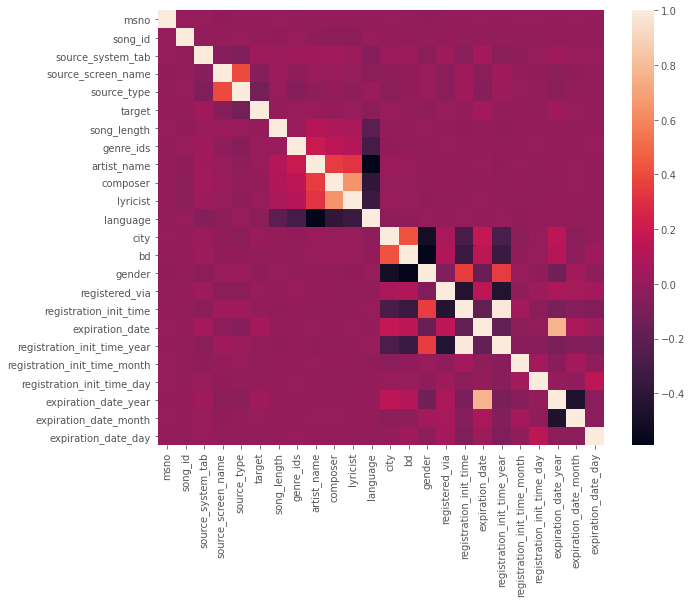

In [28]:
# Сorrelation matrix
plt.figure(figsize=[10,8])
sns.heatmap(train.corr())
plt.show()

In [29]:
# Drop columns
train = train.drop(['expiration_date', 'lyricist'], 1)

In [30]:
train.shape

(73774, 22)

#### 5.Building Models

#### Random Forest
Selected the most informative columns using Random Forest Model.

In [33]:
train1=train.copy()

In [35]:
X_train=train1.drop(['target'],axis=1).values
Y_train=train1['target'].values

In [36]:
X_train.shape

(73774, 21)

In [40]:
Y_train.shape

(73774,)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.25)

In [41]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=250, max_depth=25, random_state=0)
clf.fit(X_train,Y_train)
#y_pred = clf.predict(X_test)
#print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
#print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
#print("\n Classification Report : \n",classification_report(y_test, y_pred))

RandomForestClassifier(max_depth=25, n_estimators=250, random_state=0)

In [43]:
train_plot = pd.DataFrame({'features': train.columns[train.columns != 'target'],
                        'importances': clf.feature_importances_})
train_plot = train_plot.sort_values('importances', ascending=False)

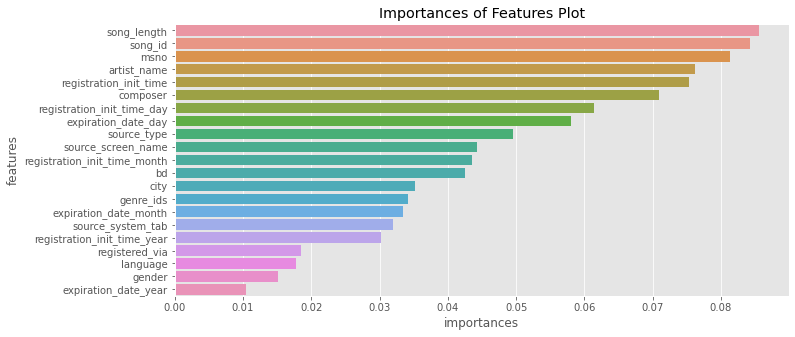

In [44]:
plt.figure(figsize=[11,5])
sns.barplot(x = train_plot.importances, y = train_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [45]:
train2=train.copy()

In [46]:
# Drop columns with importances < 0.04
train2 = train2.drop(train_plot.features[train_plot.importances < 0.04].tolist(), 1)

In [47]:
# Selected columns
train2.columns

Index(['msno', 'song_id', 'source_screen_name', 'source_type', 'target',
       'song_length', 'artist_name', 'composer', 'bd',
       'registration_init_time', 'registration_init_time_month',
       'registration_init_time_day', 'expiration_date_day'],
      dtype='object')

### XGboost

In [48]:
# Train & Test split
train3=train.copy()


In [49]:
X_train1=train3.drop(['target'],axis=1).values
Y_train1=train3['target'].values

In [50]:
x_train,x_test,y_train,y_test=train_test_split(X_train1,Y_train1,test_size=0.25)

In [51]:
# Create model
model2 = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model2.fit(X_train1, Y_train1)

[23:37:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
X_train1.shape

(73774, 21)

In [55]:
# Predicting
Prediction = model2.predict(x_test)

In [60]:
from sklearn import metrics

In [62]:
print(metrics.classification_report(y_test, Prediction))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      9048
           1       0.96      0.99      0.97      9396

    accuracy                           0.97     18444
   macro avg       0.97      0.97      0.97     18444
weighted avg       0.97      0.97      0.97     18444



### Inference:
Here we are getting very high accuracy of 97% using XGBoost Model